## Observation: Cache data from MCS

In [1]:
# import packages
import requests
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from datetime import datetime
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split

/Users/claireliu/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# device DATA: SST-mpu-0001-2
deviceId = "DPUsU10G"
deviceKey = "xtnTV0Wefm3NWzk2"
limit = 1000

# defining params
PARAMS = {'deviceKey': deviceKey, 'Content-Type' : 'application/json'} 

In [3]:
def combineURL (datachannels):
    URL = "https://api.mediatek.com/mcs/v2/devices/" + deviceId
    URL += "/datachannels/" + datachannels
    URL += "/datapoints?limit=" + str(limit)
    URL += "&order=asc"
    return URL

In [4]:
def requestData (datachannels):
    URL = combineURL(datachannels)
    r = requests.get(url = URL, params = PARAMS) 
    data = r.json()['dataChannels'][0]['dataPoints']
    for item in data:
        item[datachannels] = item['values']['value']
    df = pd.DataFrame(data, columns=['recordedAt', datachannels])
    return df

In [5]:
def changeToDatetime (ts):
    s, ms = divmod(ts, 1000)
    dtstr = datetime.fromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S')
    dt = datetime.strptime(dtstr, '%Y-%m-%d %H:%M:%S')
    return dt

In [6]:
def drawPlot (data):
    x = [changeToDatetime(item['recordedAt']) for item in data]
    y = [item['values']['value'] for item in data]
    plt.figure(figsize=(16,7))
    plt.plot(x, y)
    return plt

### 1. roll data

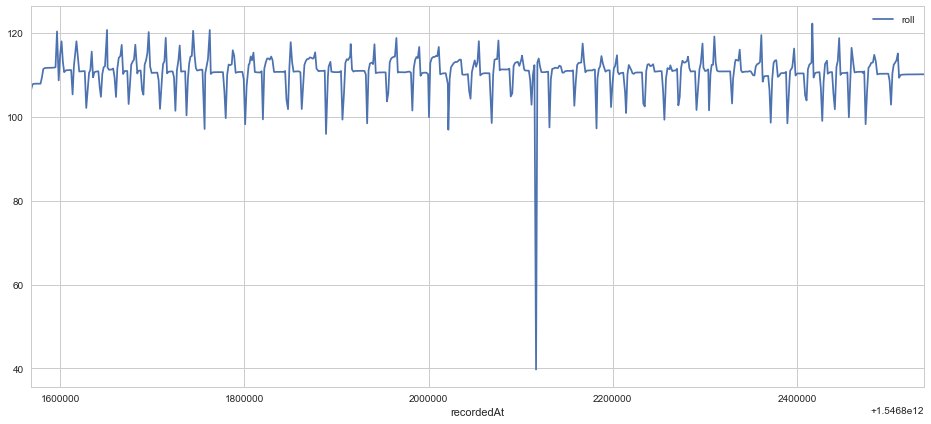

In [7]:
# sending GET request
datachannels = 'roll'
roll_df = requestData(datachannels)

# draw plot
roll_df.plot(x='recordedAt', figsize=(16,7))

### 2. yaw data

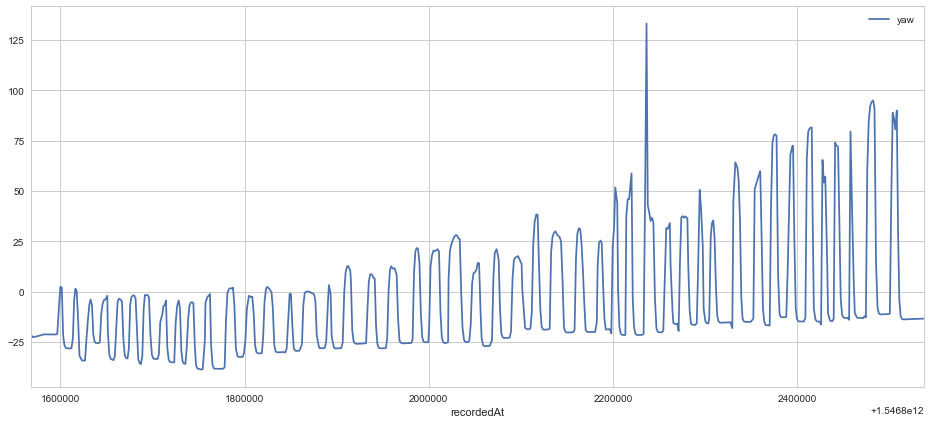

In [8]:
# sending GET request
datachannels = 'yaw'
yaw_df = requestData(datachannels)

# draw plot
yaw_df.plot(x='recordedAt', figsize=(16,7))

### 3. pitch data

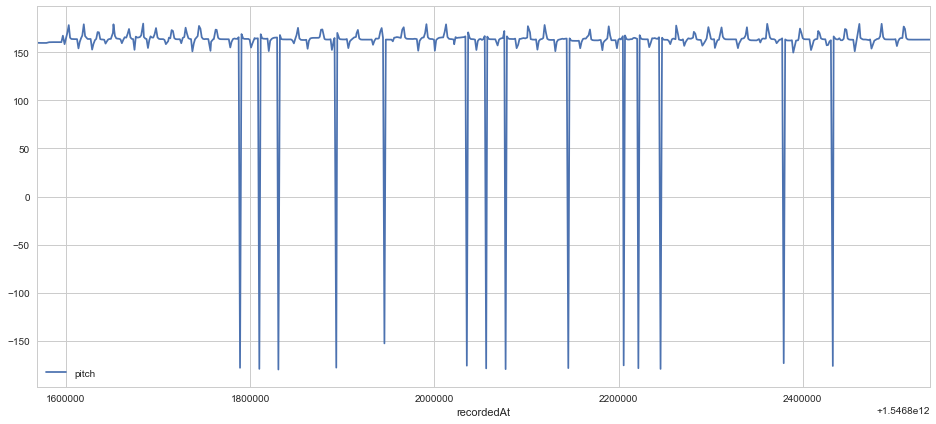

In [9]:
# sending GET request
datachannels = "pitch"
pitch_df = requestData(datachannels)

# draw plot
pitch_df.plot(x='recordedAt', figsize=(16,7))

### 4. AccelX data

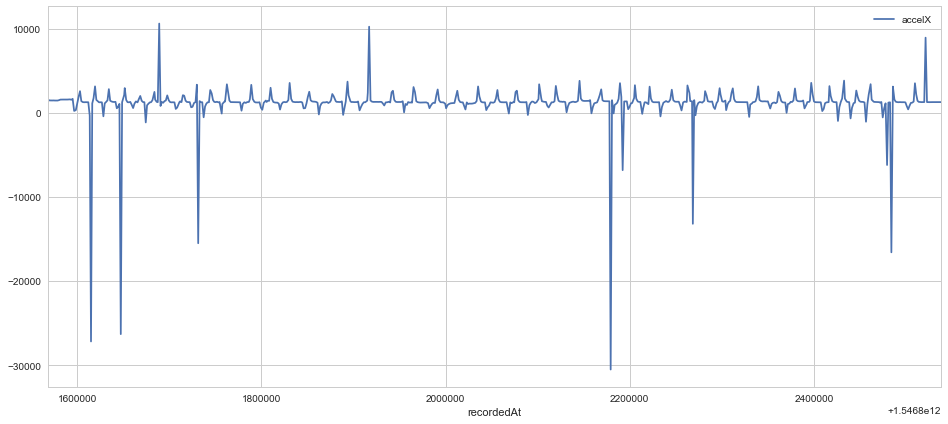

In [10]:
# sending GET request
datachannels = "accelX"
accelX_df = requestData(datachannels)

# draw plot
accelX_df.plot(x='recordedAt', figsize=(16,7))

### 5. AccelY data

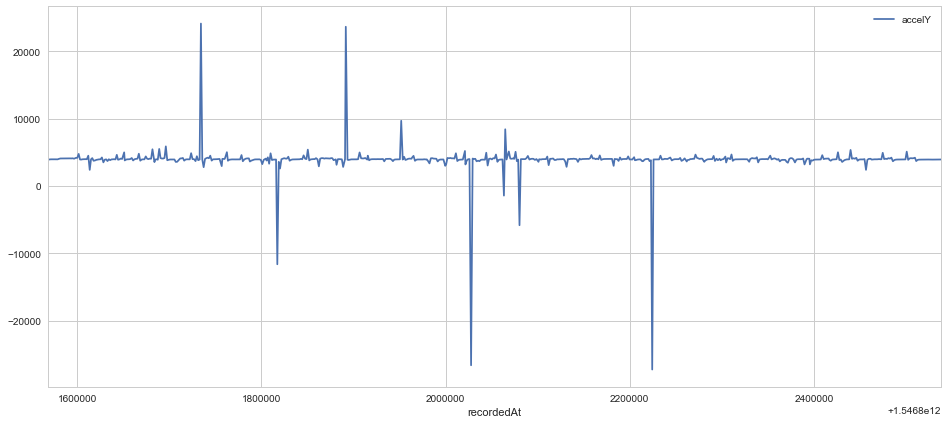

In [11]:
# sending GET request
datachannels = "accelY"
accelY_df = requestData(datachannels)

# draw plot
accelY_df.plot(x='recordedAt', figsize=(16,7))

### 6. AccelZ data

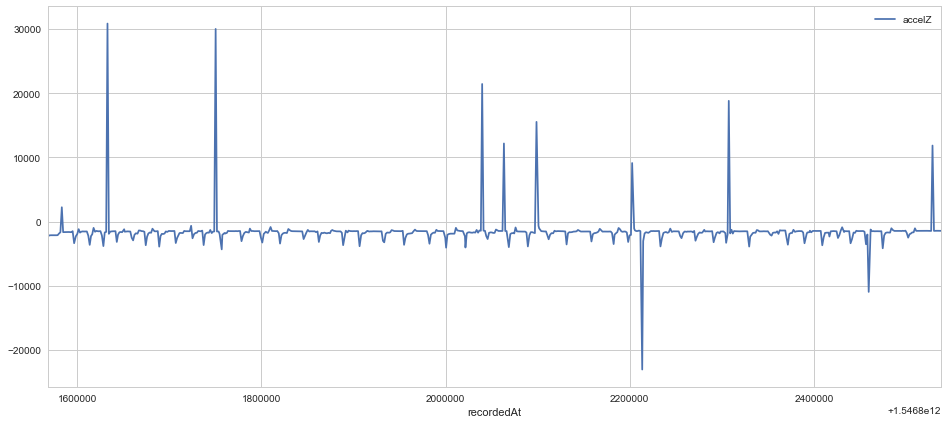

In [12]:
# sending GET request
datachannels = "accelZ"
accelZ_df = requestData(datachannels)

# draw plot
accelZ_df.plot(x='recordedAt', figsize=(16,7))

### 7. GyroX data

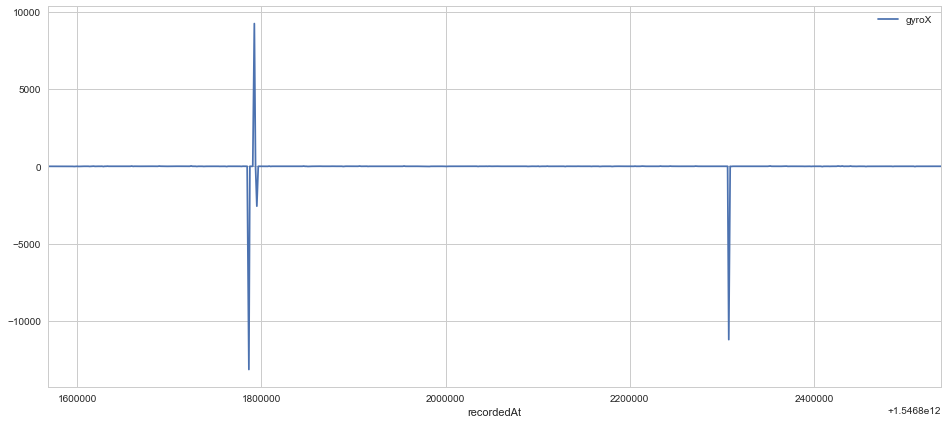

In [13]:
# sending GET request
datachannels = "gyroX"
gyroX_df = requestData(datachannels)

# draw plot
gyroX_df.plot(x='recordedAt', figsize=(16,7))

### 8. GyroY data

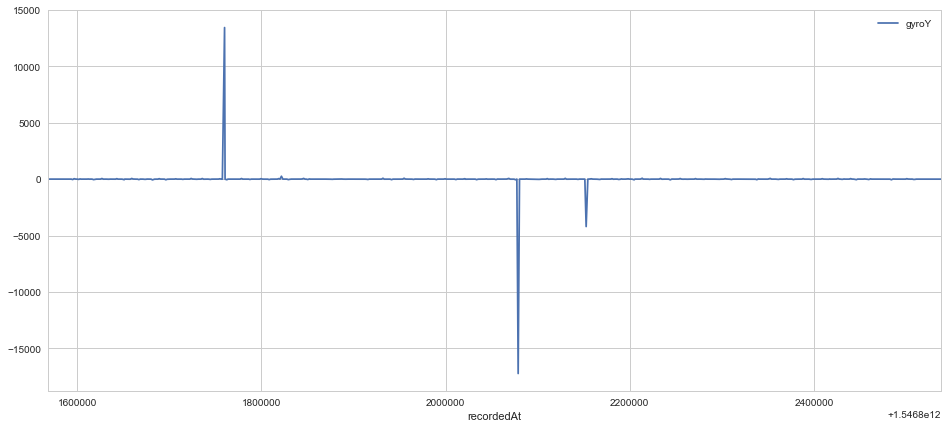

In [14]:
# sending GET request
datachannels = "gyroY"
gyroY_df = requestData(datachannels)

# draw plot
gyroY_df.plot(x='recordedAt', figsize=(16,7))

### 9. GyroZ data

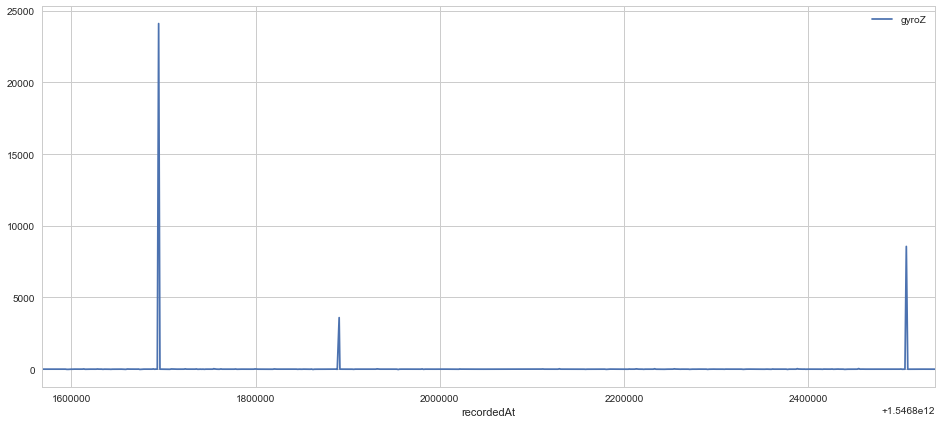

In [15]:
# sending GET request
datachannels = "gyroZ"
gyroZ_df = requestData(datachannels)

# draw plot
gyroZ_df.plot(x='recordedAt', figsize=(16,7))

### Combine all data, then do preprocessing
#### reference:
1. [Basic statistics in pandas DataFrame]('https://medium.com/@kasiarachuta/basic-statistics-in-pandas-dataframe-594208074f85')

In [16]:
df = pd.merge(yaw_df, roll_df, on='recordedAt')
df = pd.merge(df, pitch_df, on='recordedAt')
df = pd.merge(df, accelX_df, on='recordedAt')
df = pd.merge(df, accelY_df, on='recordedAt')
df = pd.merge(df, accelZ_df, on='recordedAt')
df = pd.merge(df, gyroX_df, on='recordedAt')
df = pd.merge(df, gyroY_df, on='recordedAt')
df = pd.merge(df, gyroZ_df, on='recordedAt')
df.head()

,recordedAt,yaw,roll,pitch,accelX,accelY,accelZ,gyroX,gyroY,gyroZ
0,1546801568435,-21.56,106.43,160.33,1531,3896,-2245,-3,1,0
1,1546801569981,-22.58,107.76,159.82,1456,3944,-2141,-3,1,0
2,1546801571486,-22.48,107.88,159.75,1448,3959,-2125,-3,1,0
3,1546801572944,-22.33,107.91,159.74,1450,3955,-2128,-3,1,0
4,1546801574351,-22.16,107.91,159.74,1455,3964,-2133,-3,1,0


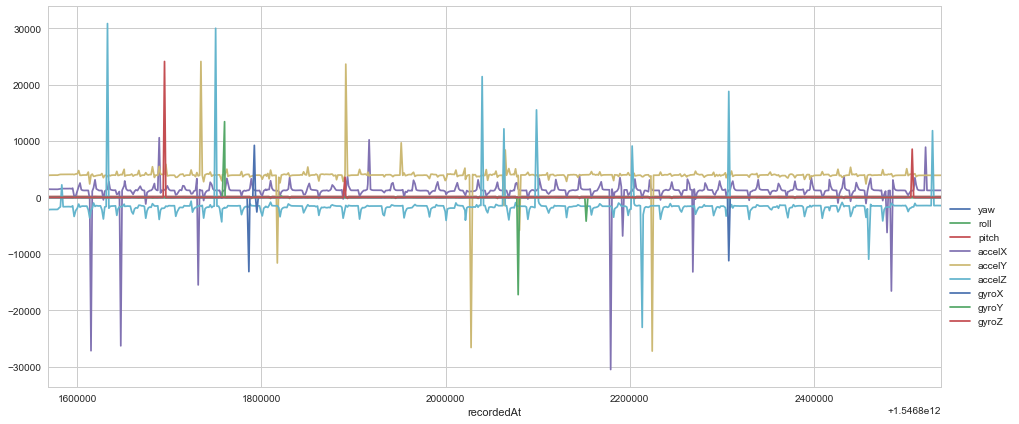

In [17]:
df.plot(x='recordedAt', figsize=(16,7)).legend(loc=2, bbox_to_anchor=(1, 0.5))

In [18]:
df.shape

(648, 10)

In [19]:
df.dtypes

recordedAt      int64
yaw           float64
roll          float64
pitch         float64
accelX          int64
accelY          int64
accelZ          int64
gyroX           int64
gyroY           int64
gyroZ           int64
dtype: object

In [20]:
df.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
recordedAt,648,1546802051849,280413,1546801568435,1546801809509,1546802050926,1546802294519,1546802537860
yaw,648,-4,28,-38,-23,-13,5,133
roll,648,110,4,39,110,110,112,122
pitch,648,156,49,-179,162,163,164,179
accelX,648,1132,2481,-30506,1193,1262,1405,10586
accelY,648,3916,2218,-27238,3920,3966,4051,24106
accelZ,648,-1537,2647,-23032,-1794,-1542,-1481,30830
gyroX,648,-27,776,-13148,-1,0,0,9233
gyroY,648,-12,874,-17232,-1,0,0,13434
gyroZ,648,55,1014,-25,-1,0,0,24108


### Removing Outliers

#### reference:
1. [Ways to Detect and Remove the Outliers]('https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba')
2. [使用pandas進行數據清洗]('https://hk.saowen.com/a/ac6c81ad3f801cf0aecd4bfa890786313eb2672563b1f0e91318c91e0475612b')
3. [replace outliers | Kaggle]('https://www.kaggle.com/general/24617')

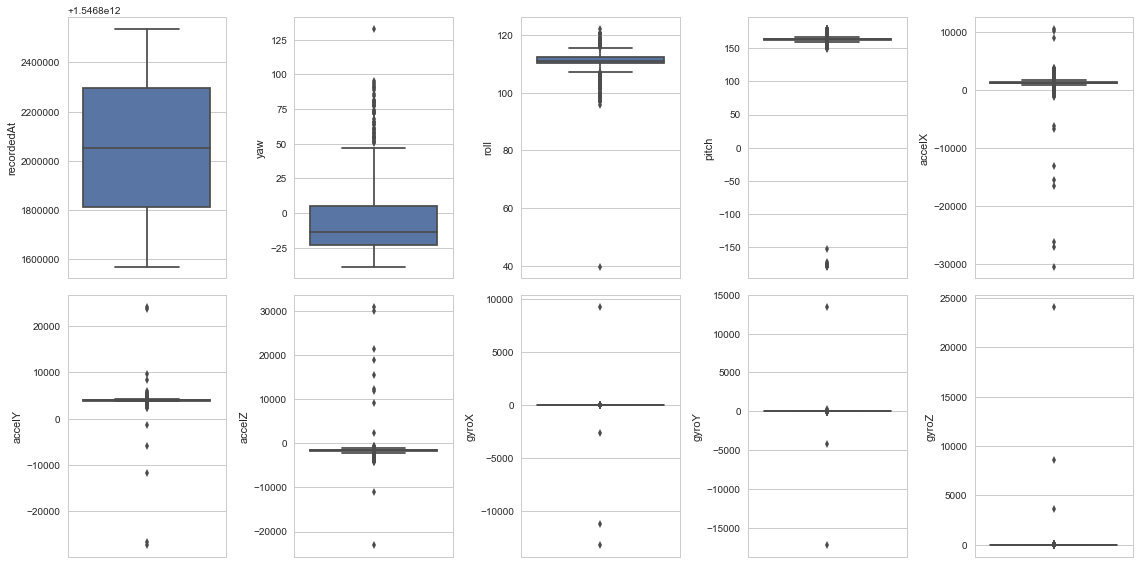

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
sns.set(font_scale=1)
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x= df.iloc[:, i],  orient='v' , ax=ax)
fig.tight_layout()

In [23]:
def outliers(x):
    return np.abs(x-x.median()) > 1.5*(x.quantile(.95)-x.quantile(.05))

In [24]:
def replace(x): # x is a vector
    out = outliers(x)
    outlier = x[out]
    line = x.mode()[0]
    a = x[~out]
    maximum = a[a > line].median()
    minimum = a[a > line].median()
    x = x.replace(outlier.loc[out < line], minimum)
    x = x.replace(outlier.loc[out > line], maximum)
    return x

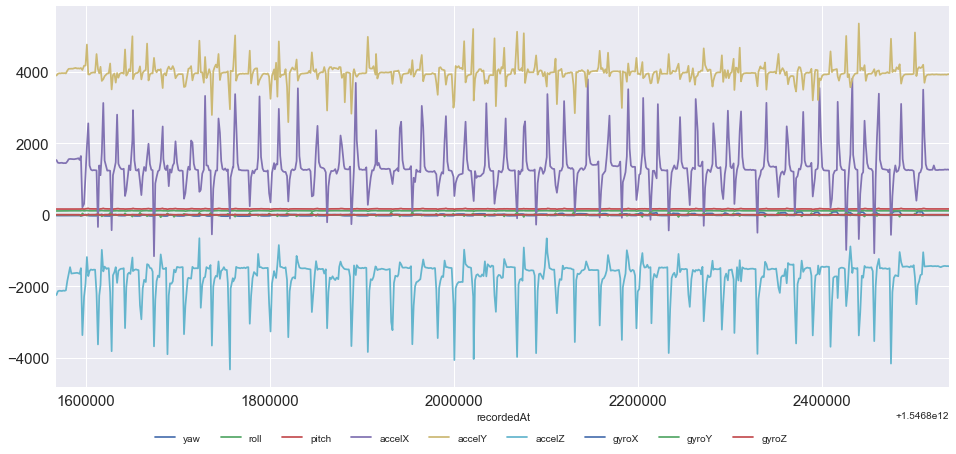

In [25]:
for x in df.iloc[:,1:]:
    df[x] = replace(df[x])
df.plot(x='recordedAt', figsize=(16,7), legend=True, fontsize=15).legend(
    loc=2, bbox_to_anchor=(0.1, -0.1), fancybox=True, ncol=9)

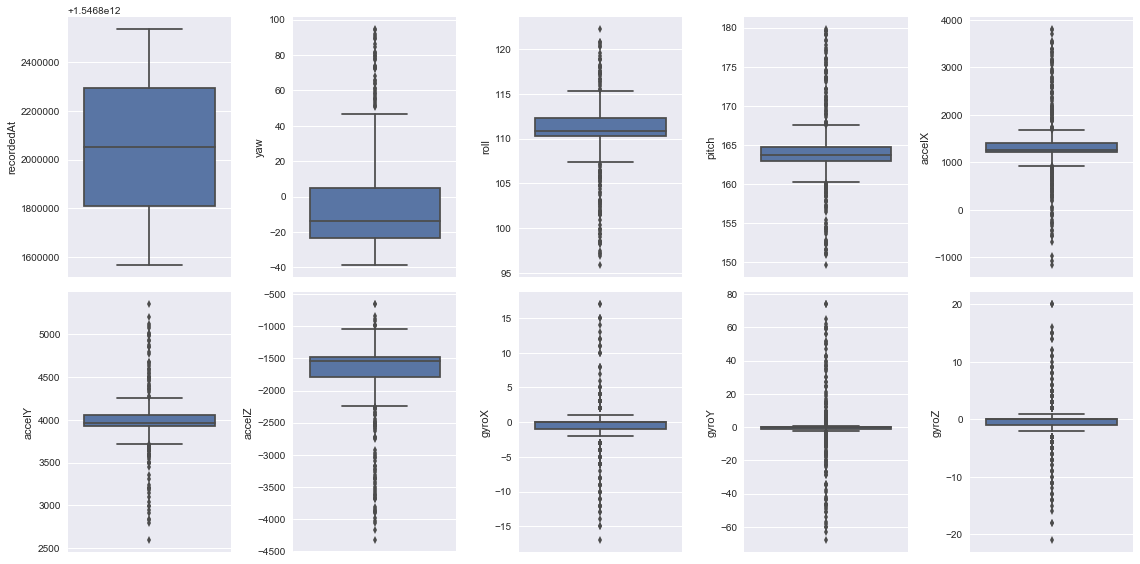

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
sns.set(font_scale=1)
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x= df.iloc[:, i],  orient='v' , ax=ax)
fig.tight_layout()

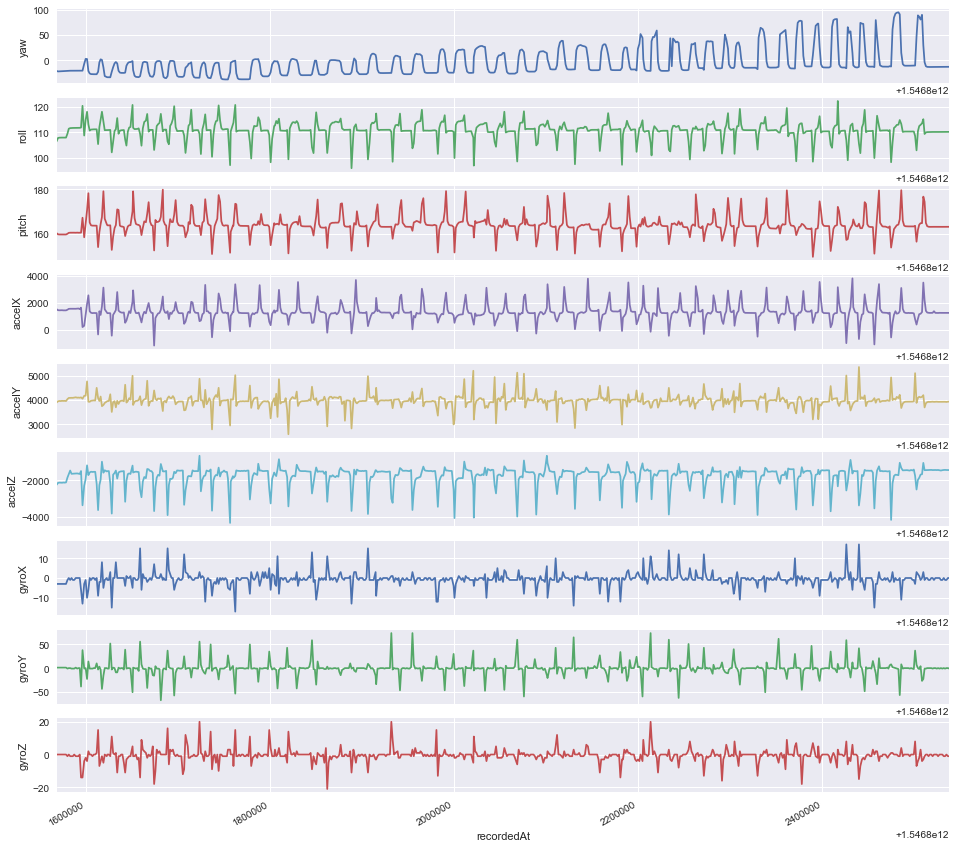

In [27]:
plot = df.plot(x='recordedAt', subplots=True, legend=False, kind='line', 
               grid=True, figsize=(16,16), sharey=False, sharex=True)
for x in range(0,plot.size):
    plot[x].set_ylabel(df.columns[x+1])

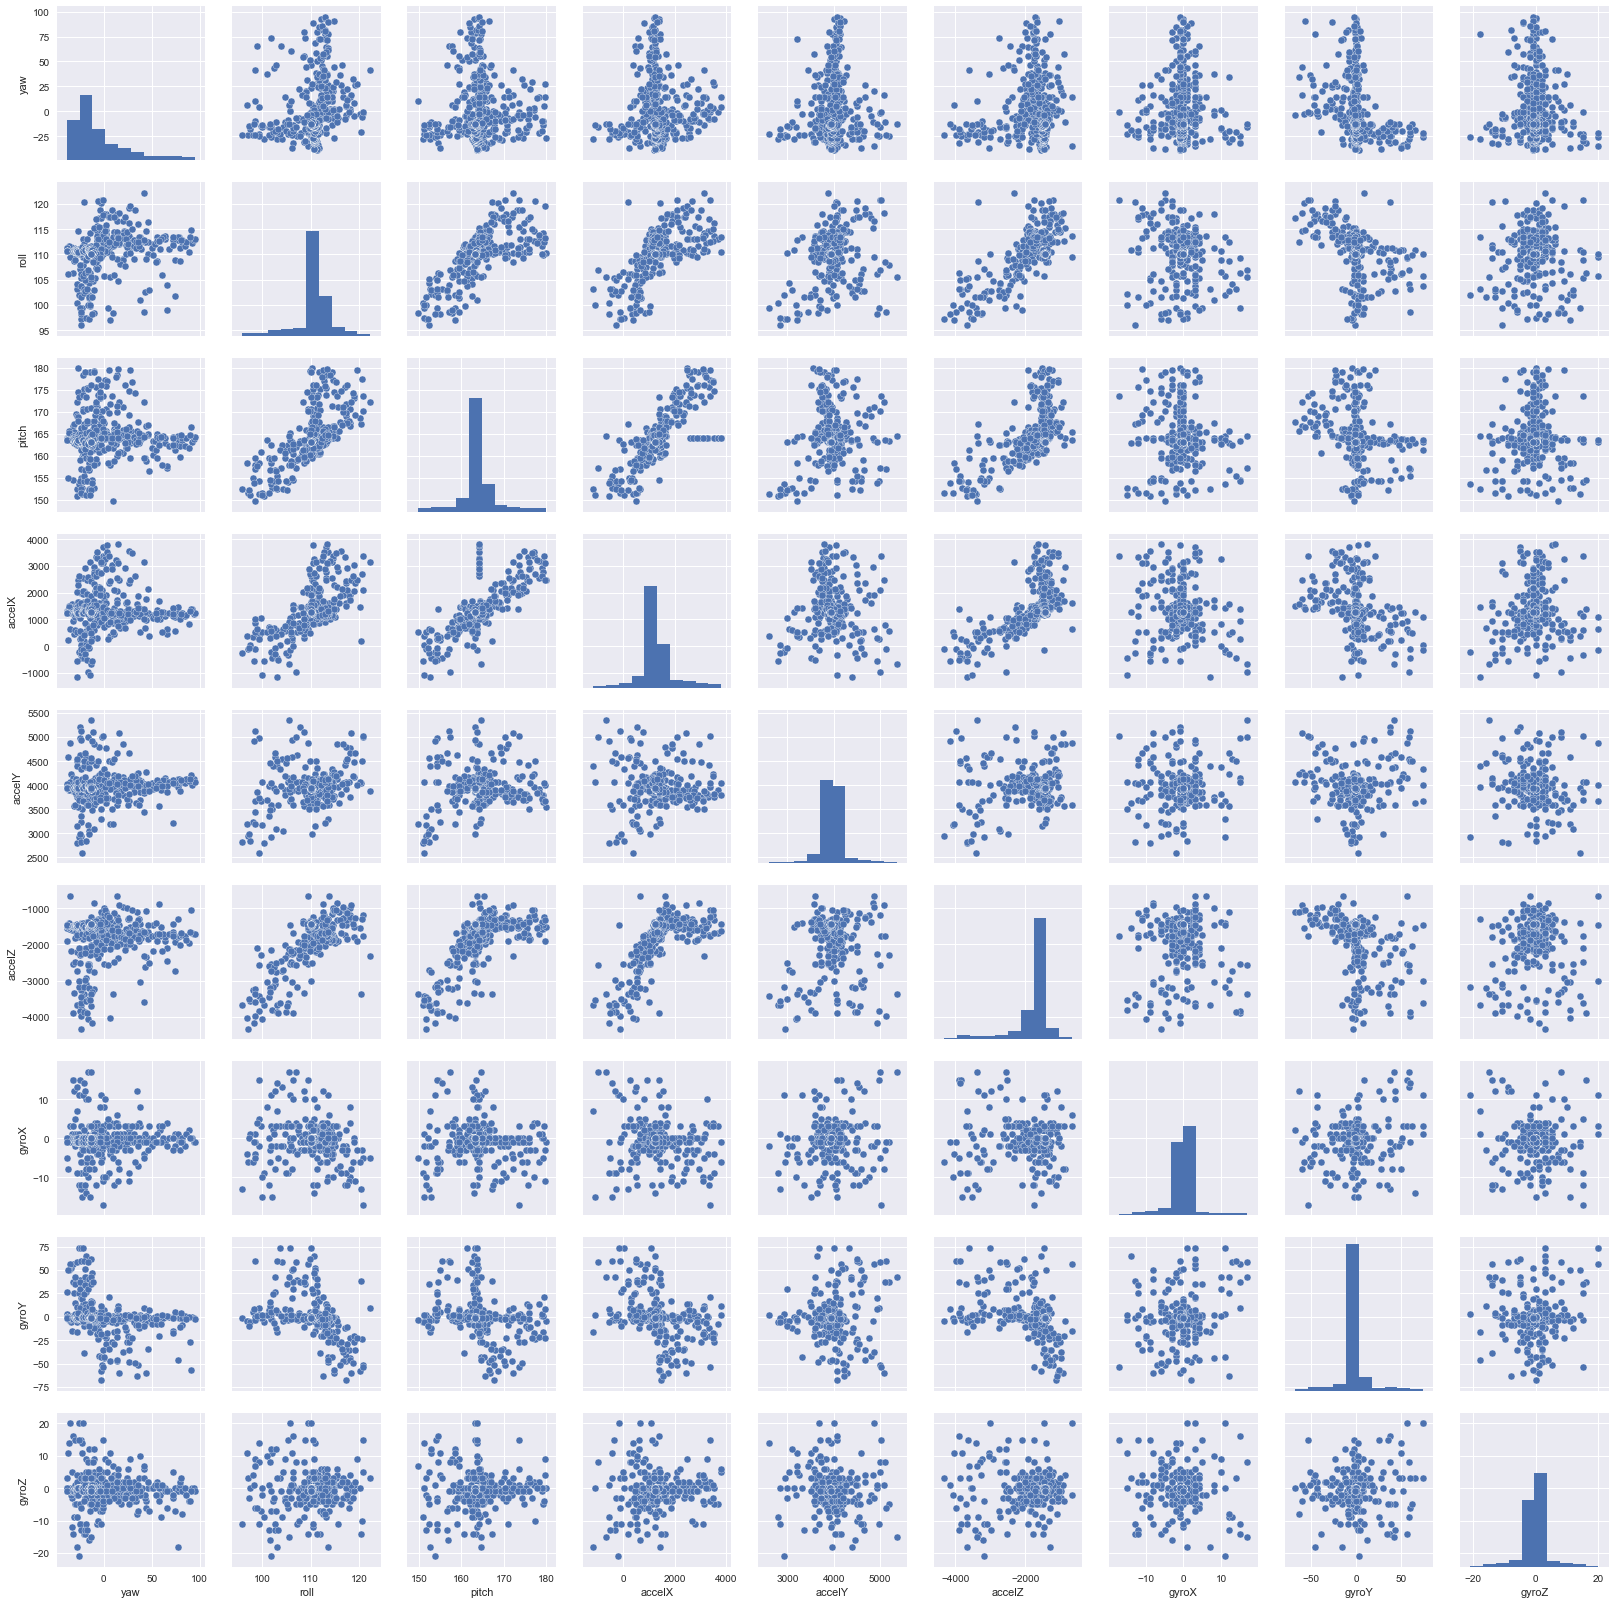

In [28]:
sns.pairplot(df.iloc[:,1:])

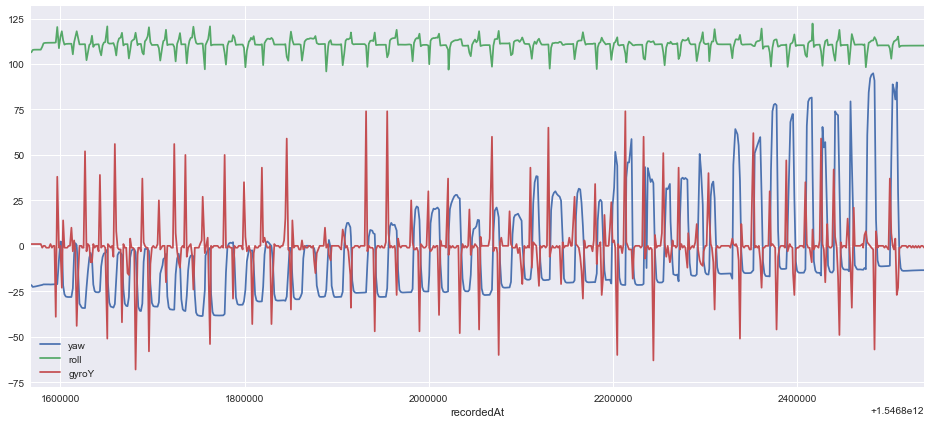

In [29]:
df[['recordedAt', 'yaw', 'roll', 'gyroY']].plot(x='recordedAt', figsize=(16,7))

### Cut data

#### references:
1. [python大資料分析——連續屬性離散化]('https://www.itread01.com/content/1543470602.html')

### Give data a tag

In [30]:
df['label'] = 0
df.loc[df.gyroY > df.gyroY.std(), 'label'] = 1
df.loc[df.gyroY < -df.gyroY.std(), 'label'] = 2

### PCA

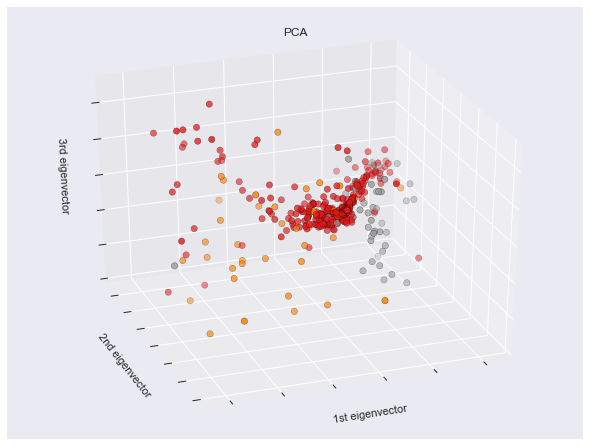

In [31]:
X = np.matrix(df.drop(['recordedAt'], axis=1))
Y = np.array(df['label'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

### SVM

In [32]:
# Input Data Preparation
X = np.matrix(df.drop(['recordedAt'], axis=1))
Y = np.array(df['label'])

print(X.shape)
print(Y.shape)
print(sum(Y)/len(Y))

(648, 10)
(648,)
0.208333333333


In [33]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=4242)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(518, 10)
(130, 10)
(518,)
(130,)


In [34]:
from sklearn.svm import SVC
svm = SVC(C=1, kernel='linear')
svm.fit(x_train, y_train) 

y_pred = svm.predict(x_train)
print("Train: Number of mislabeled points out of a total %d points : %d" % (x_train.shape[0], pd.Series(y_train != y_pred).astype(int).sum()))
y_pred = svm.predict(x_valid)
print("Valid: Number of mislabeled points out of a total %d points : %d" % (x_valid.shape[0], pd.Series(y_valid != y_pred).astype(int).sum()))

Train: Number of mislabeled points out of a total 518 points : 0
Valid: Number of mislabeled points out of a total 130 points : 2


### Prediction

In [35]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# Fetch the service account key JSON file contents
cred = credentials.Certificate('smart-sensor-tag-firebase-adminsdk-qorgv-cbf66e542c.json')

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://smart-sensor-tag.firebaseio.com/'
})

In [36]:
def getDataByRef(name):
    ref = db.reference('/' + name)
    return ref.get()

In [37]:
def convertDataToDf(data):
    data = getDataByRef('0001')
    df = [val for val in data.values()]
    df = pd.DataFrame(df)
    cols = ['timestamp', 'roll', 'yaw', 'pitch', 
            'accelX', 'accelY', 'accelZ',
            'gyroX', 'gyroY', 'gyroZ']
    df = df[cols]
    df.timestamp = df.timestamp.astype('int64')
    df.iloc[:,1:4] = df.iloc[:,1:4].astype('float64')
    df.iloc[:,4:] = df.iloc[:,4:].astype('int64')
    df.timestamp = df.timestamp.apply(lambda x : x % 10000000)
    df.sort_values(by=['timestamp'])
    return df

In [38]:
data = getDataByRef('0001')
df_test = convertDataToDf(data)
df_test.head()

,timestamp,roll,yaw,pitch,accelX,accelY,accelZ,gyroX,gyroY,gyroZ
0,7215803,106.32,-20.41,160.73,1287,3850,-1985,-3,1,0
1,7215806,106.32,-19.98,160.72,1287,3847,-1981,-3,1,0
2,7215809,106.30,-19.66,160.72,1289,3846,-1970,-3,1,0
3,7215811,109.70,-19.49,161.44,1439,3958,-1481,-1,-2,0
4,7215814,103.97,-26.26,150.00,511,4011,-2113,6,28,-8


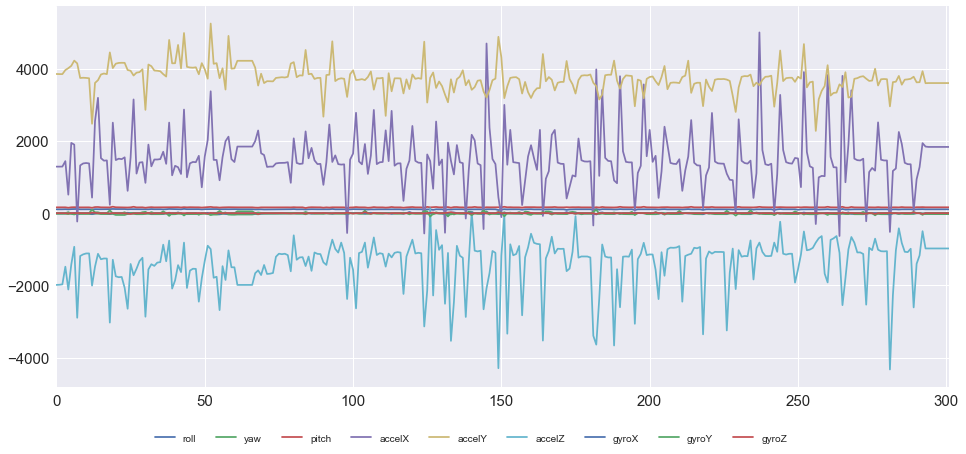

In [42]:
# preprocessing
for x in df_test.iloc[:,1:]:
    df_test[x] = replace(df_test[x])
df_test.iloc[:,1:].plot(figsize=(16,7), legend=True, fontsize=15).legend(
    loc=2, bbox_to_anchor=(0.1, -0.1), fancybox=True, ncol=9)

In [43]:
ID = df_test['timestamp']
X_test = np.matrix(df_test)

# svm = SVC(C=1, kernel='linear')
# svm.fit(x_train, y_train) 
# y_pred = bst.predict(xgb.DMatrix(X_test))
y_pred = svm.predict(X_test)
print(X_test.shape)
print(y_pred.shape)

(302, 10)
(302,)


In [44]:
df_submit = pd.DataFrame()
df_submit['timestamp'] = ID
df_submit['label'] = (y_pred > 0.5) * 1
# df_submit['Survived'] = 0
df_submit.to_csv("submit.csv", index=False)

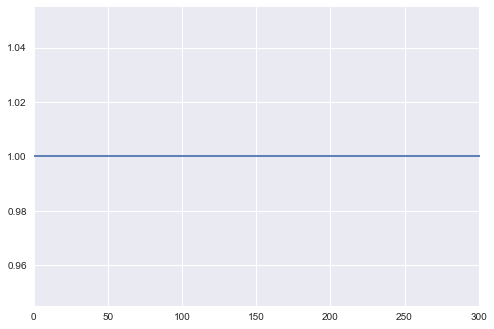

In [45]:
df_submit.label.plot()